In [1]:
import numpy as np
import pandas as pd
import sys
from math import cos, asin, sqrt, pi
import matplotlib.pyplot as plt

In [2]:
#input1 = sys.argv[1]
#input2 = sys.argv[2]
input1 = 'stations.json.gz'
input2 = 'city_data.csv'
stations = pd.read_json(input1, lines=True)
stations['avg_tmax'] = stations['avg_tmax']/10  #since avgtmax is 10C, we need to divid by 10

In [10]:
city_data = pd.read_csv(input2)
city_data = city_data.dropna() #remove NaN
city_data = city_data.groupby(['name','population']).sum()
city_data = city_data.reset_index()
#city_data = city_data.reset_index(drop = True)
city_data

,name,population,area,latitude,longitude
0,Abbotsford,133497.0,3.755500e+08,49.054611,-122.328000
1,Abilene,117063.0,2.865000e+08,32.446389,-99.745556
2,Akron,199110.0,1.615400e+08,41.073056,-81.517778
3,Albuquerque,545852.0,4.909000e+08,35.116667,-106.616667
4,Alexandria,153511.0,4.010000e+07,38.804722,-77.047222
5,Allentown,119104.0,4.661978e+07,40.600000,-75.483333
6,Amarillo,190695.0,2.339000e+08,35.199167,-101.845278
7,Amos,12823.0,4.270000e+08,48.566667,-78.116667
8,Anaheim,336265.0,1.316000e+08,33.836111,-117.889722
9,Anchorage,298695.0,5.098651e+09,61.218333,-149.899167


In [4]:
city_data['area'] = city_data['area']/10**6  #convert to km^2
city_data = city_data[city_data['area'] <= 10000].reset_index(drop=True) # order index 


In [5]:
city_data['density'] = city_data['population']/city_data['area']  # density is population divide area

#https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula/21623206
#The below code for caculation of two points is Edited by Alexander Volkov, Answered by Salvador Dali 
#used from excersie 3
def distance_between_points(lat1, lon1, lat2, lon2):
    p = pi/180     #Pi/180
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) *  (1 - cos((lon2 - lon1) * p)) / 2
    
    return 12742 * asin(sqrt(a))
distance_for_points = np.vectorize(distance_between_points)

In [6]:
def distance(city, stations):
    #https://www.geeksforgeeks.org/python-pandas-series/
    #this site helped with understanding using pd.Series
    list = (distance_for_points(city['latitude'],city['longitude'],stations['latitude'],stations['longitude']))
    DataFrame = pd.Series(list)
    return DataFrame

def best_tmax(city, stations): #the best avg_tmax
    DataFrame = distance(city, stations)
    #uses distance to find best temperture
    best_tmax = stations['avg_tmax'][DataFrame.idxmin()]
    return best_tmax
#print(stations)

In [7]:
city_data['best_tmax'] = city_data.apply(best_tmax, axis = 1, stations = stations)
city_data

,population,area,latitude,longitude,density,best_tmax
0,133497.0,375.550000,49.054611,-122.328000,355.470643,15.782787
1,117063.0,286.500000,32.446389,-99.745556,408.596859,25.364754
2,199110.0,161.540000,41.073056,-81.517778,1232.573975,17.793906
3,545852.0,490.900000,35.116667,-106.616667,1111.941332,22.129235
4,153511.0,40.100000,38.804722,-77.047222,3828.204489,20.480601
5,119104.0,46.619785,40.600000,-75.483333,2554.795137,18.543169
6,190695.0,233.900000,35.199167,-101.845278,815.284310,23.667760
7,12823.0,427.000000,48.566667,-78.116667,30.030445,11.207071
8,336265.0,131.600000,33.836111,-117.889722,2555.205167,26.827198
9,298695.0,5098.650594,61.218333,-149.899167,58.583148,9.483242


IndexError: list index out of range

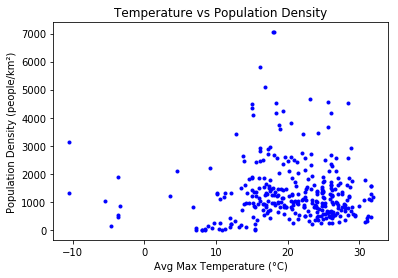

In [8]:
plt.plot( city_data['best_tmax'], city_data['density'], 'b.')
plt.title('Temperature vs Population Density')
plt.xlabel('Avg Max Temperature (\u00b0C)')  #degree C
plt.ylabel('Population Density (people/km\u00b2)')  #km^2
plt.savefig(sys.argv[3])